In [1]:
from analyze_perks import compare_perks
from perks import apply_perk, compare_various_perks, START
from attack_sequences import TYPICAL_ATTACKS

%matplotlib inline

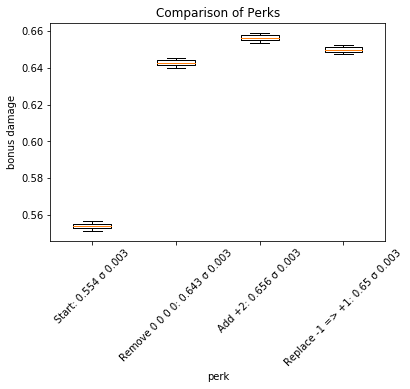

In [2]:
compare_perks(
    compare_various_perks(START), 
    TYPICAL_ATTACKS,
    10000,
)